### **Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import ADASYN

### **Import Kaggle Dataset**

In [2]:
df = pd.read_csv("../input/cervical-cancer-risk-classification/kag_risk_factors_cervical_cancer.csv")
df.head(10) #print first 10 entries of the dataset

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


### **Inspect the dataset**

In [3]:
print(df.shape)

(858, 36)


In [4]:
print(df.dtypes)

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [5]:
print(df.describe())

              Age  STDs: Number of diagnosis   Dx:Cancer      Dx:CIN  \
count  858.000000                 858.000000  858.000000  858.000000   
mean    26.820513                   0.087413    0.020979    0.010490   
std      8.497948                   0.302545    0.143398    0.101939   
min     13.000000                   0.000000    0.000000    0.000000   
25%     20.000000                   0.000000    0.000000    0.000000   
50%     25.000000                   0.000000    0.000000    0.000000   
75%     32.000000                   0.000000    0.000000    0.000000   
max     84.000000                   3.000000    1.000000    1.000000   

           Dx:HPV          Dx  Hinselmann    Schiller    Citology      Biopsy  
count  858.000000  858.000000  858.000000  858.000000  858.000000  858.000000  
mean     0.020979    0.027972    0.040793    0.086247    0.051282    0.064103  
std      0.143398    0.164989    0.197925    0.280892    0.220701    0.245078  
min      0.000000    0.000000  

In [6]:
df = df.replace('?', np.NaN) #replacing missing values with Numpy NaN
print(df.isnull().sum())

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

### **Identifying the percentage of missing values in each risk factor**

<AxesSubplot:>

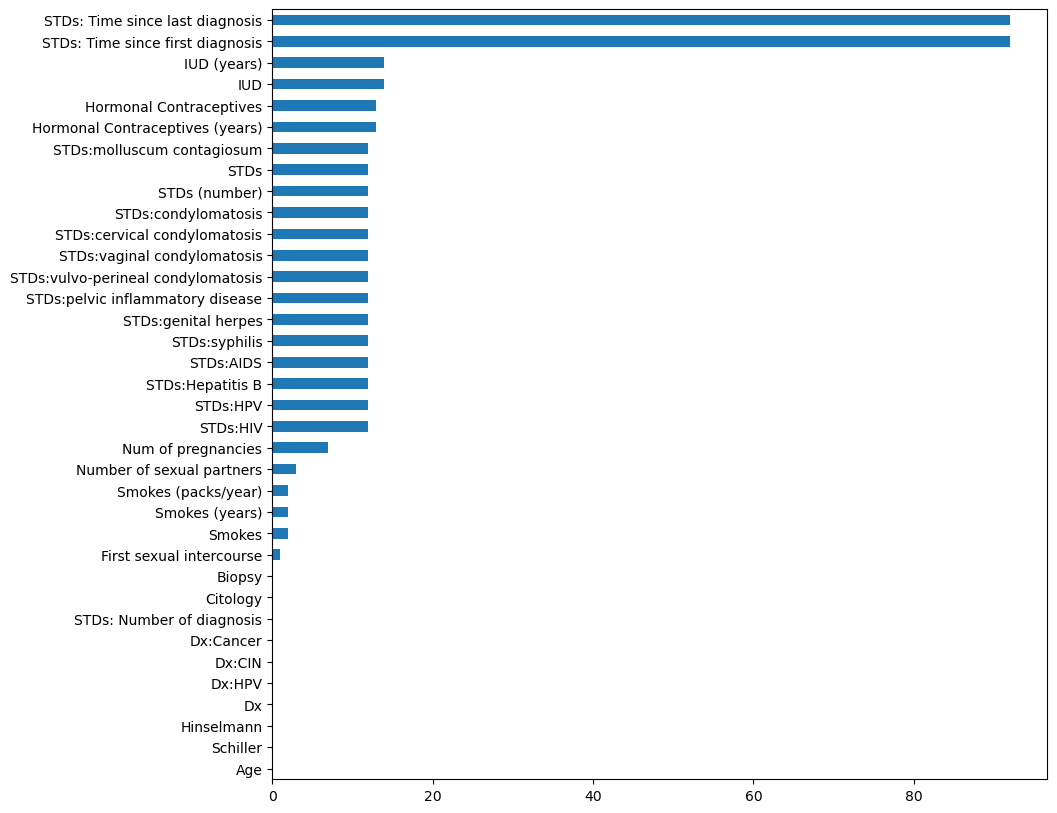

In [7]:
plt.figure(figsize=(10,10))
np.round(df.isnull().sum()/df.shape[0]*100).sort_values().plot(kind='barh')

#### **Now, columns STDs: Time since last diagnosis and STDs: Time since first diagnoses have a lot of missing values so we drop them as they won't be helpful in training the model.**

In [8]:
new_df = df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],axis=1) 
print(new_df.shape)

(858, 34)


#### **Assigning numerical and categorical columns manually**

In [9]:
numerical_df = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
categorical_df = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx','Hinselmann','Schiller','Citology','Biopsy']

## **Data Preprocessing: Dealing with missing values**

### **Imputing the numerical columns with median**

In [10]:
for feature in numerical_df:
    print(feature, '', pd.to_numeric(new_df[feature], errors='coerce').median())
    feature_median = round(pd.to_numeric(new_df[feature], errors='coerce').median(), 1)
    new_df[feature] = pd.to_numeric(new_df[feature], errors='coerce').fillna(feature_median)
new_df.head(20)

Age  25.0
Number of sexual partners  2.0
First sexual intercourse  17.0
Num of pregnancies  2.0
Smokes (years)  0.0
Smokes (packs/year)  0.0
Hormonal Contraceptives (years)  0.5
IUD (years)  0.0
STDs (number)  0.0


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.00,1.0,...,0.0,0,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.00,1.0,...,0.0,0,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0,1,0,1,1,0,0,0,0
9,44,3.0,15.0,2.0,1.0,1.266973,2.8,0.0,0.00,NaN,...,0.0,0,0,0,0,0,0,0,0,0


### **Imputing the categorical columns with mode**

In [11]:
for feature in categorical_df:
    print(feature, '', new_df[feature].mode()[0])
    feature_mode = new_df[feature].mode()[0]
    new_df[feature] = new_df[feature].fillna(feature_mode)
new_df.head(20)

Smokes  0.0
Hormonal Contraceptives  1.0
IUD  0.0
STDs  0.0
STDs:condylomatosis  0.0
STDs:cervical condylomatosis  0.0
STDs:vaginal condylomatosis  0.0
STDs:vulvo-perineal condylomatosis  0.0
STDs:syphilis  0.0
STDs:pelvic inflammatory disease  0.0
STDs:genital herpes  0.0
STDs:molluscum contagiosum  0.0
STDs:AIDS  0.0
STDs:HIV  0.0
STDs:Hepatitis B  0.0
STDs:HPV  0.0
STDs: Number of diagnosis  0
Dx:Cancer  0
Dx:CIN  0
Dx:HPV  0
Dx  0
Hinselmann  0
Schiller  0
Citology  0
Biopsy  0


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.00,1.0,...,0.0,0,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.00,1.0,...,0.0,0,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0,1,0,1,1,0,0,0,0
9,44,3.0,15.0,2.0,1.0,1.266973,2.8,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0


## **Data Preprocessing: Removing outliers**

#### **The dataset that we have doesn't require removing outliers but still we can do it just to show that outliers can be removed as well**

#### **First we calculate the Coefficient of Variance of the numerical columns just to get an idea of how dispersed the data in the columns is**

In [12]:
numerical_columns = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)',
                     'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)']

cv_dict = {}

for column in numerical_columns:
    mean = new_df[column].mean()
    std_dev = new_df[column].std()
    cv = std_dev / mean * 100
    cv_dict[column] = cv

print("Coefficient of variation for each numerical column:")
for key, value in cv_dict.items():
    print(f"{key}: {value:.2f}%")

Coefficient of variation for each numerical column:
Age: 31.68%
Number of sexual partners: 65.49%
First sexual intercourse: 16.43%
Num of pregnancies: 62.06%
Smokes (years): 338.04%
Smokes (packs/year): 495.29%
Hormonal Contraceptives (years): 175.26%
IUD (years): 408.05%
STDs (number): 341.66%


#### **Now, Smokes (packs/year) has the largest CV so we will remove its outliers**

#### **Making a violin plot of Age vs Smokes (packs/year) (before removing outliers)**

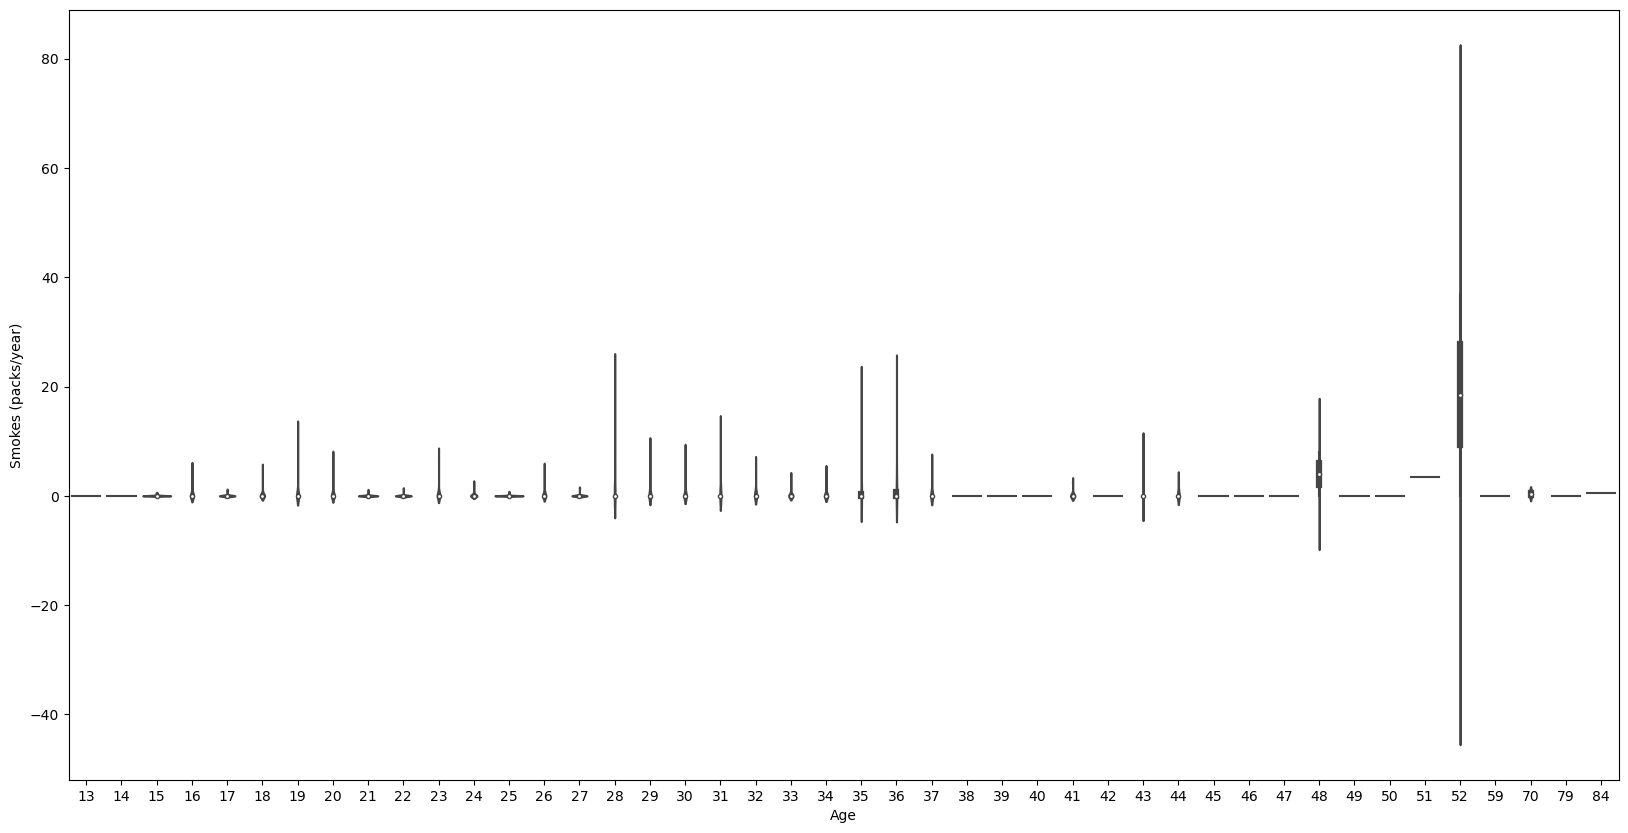

In [13]:
plt.figure(figsize=(20, 10))
# Create the violin plot for age and Smokes (packs/year)
sns.violinplot(data=new_df, x="Age", y='Smokes (packs/year)')

# Show the plot
plt.show()


### **Removing outliers in the numerical column Smokes (packs/year)**

#### (Everything above 95th percentile is considered a quartile)

In [14]:
Q3 = new_df['Smokes (packs/year)'].quantile(0.95)
new_df = new_df[new_df['Smokes (packs/year)'] <= Q3]
print(new_df.shape)


(815, 34)


#### **Making a violin plot of Age vs Smokes (packs/year) (after removing outliers)**

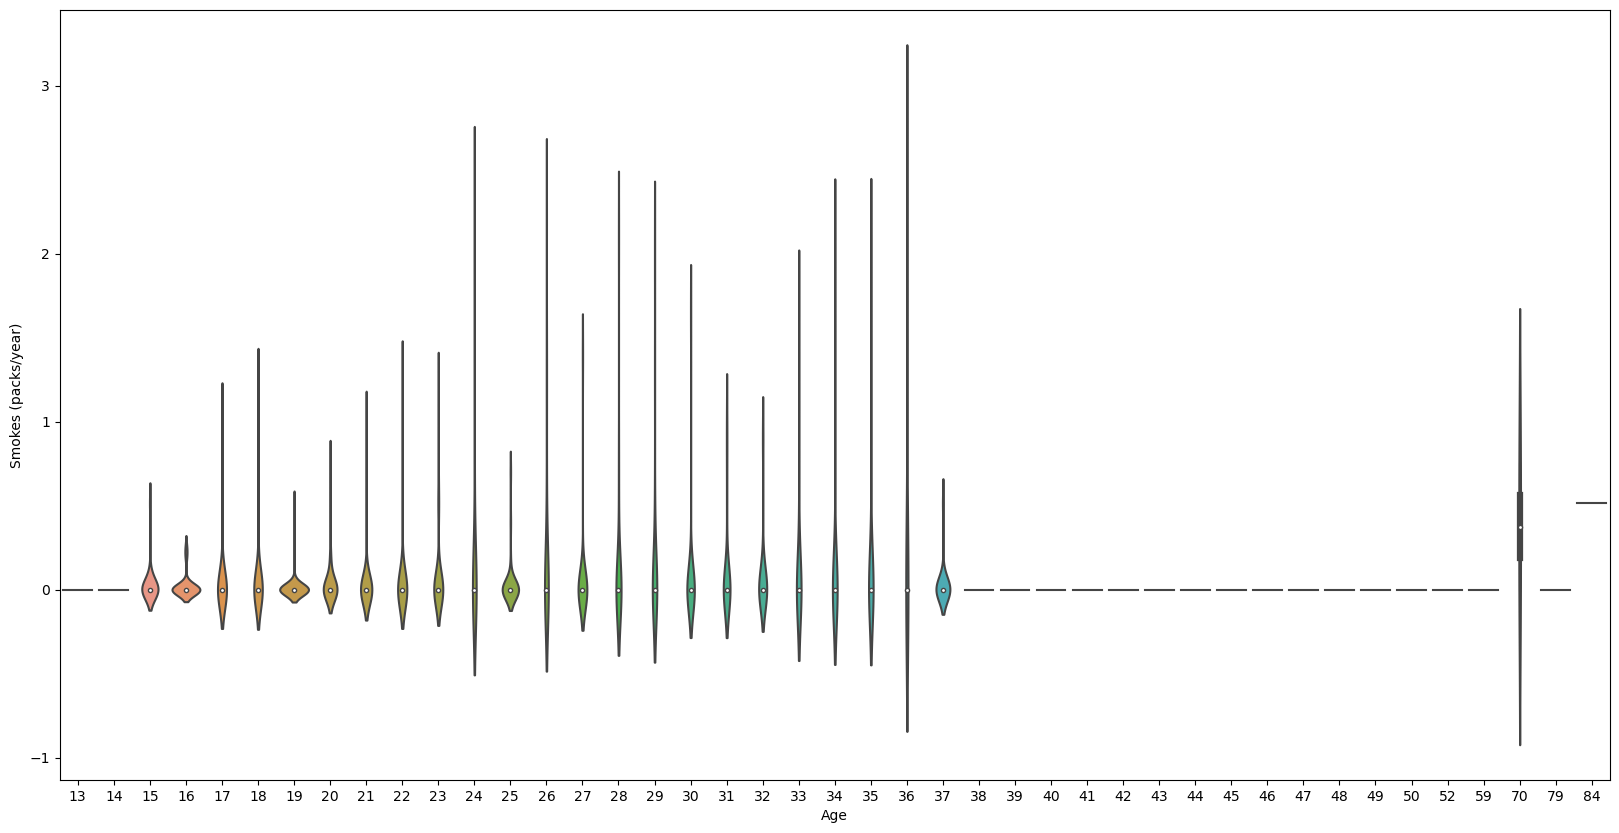

In [15]:
plt.figure(figsize=(20, 10))
# Create the violin plot for age and Smokes (packs/year) after removing outliers
sns.violinplot(data=new_df, x="Age", y='Smokes (packs/year)')
plt.show()


In [16]:
Q3 = new_df['IUD (years)'].quantile(0.95)
new_df = new_df[new_df['IUD (years)'] <= Q3]
print(new_df.shape)

(776, 34)


In [17]:
Q3 = new_df['STDs (number)'].quantile(0.95)
new_df = new_df[new_df['STDs (number)'] <= Q3]
print(new_df.shape)

(739, 34)


In [18]:
Q3 = new_df['Smokes (years)'].quantile(0.95)
train_df = new_df[new_df['Smokes (years)'] <= Q3]
print(new_df.shape)

(739, 34)


In [19]:
Q3 = new_df['Hormonal Contraceptives (years)'].quantile(0.95)
new_df = new_df[new_df['Hormonal Contraceptives (years)'] <= Q3]
print(new_df.shape)

(709, 34)


### **Splitting Test and Train data**

In [20]:
X = new_df.iloc[:, :-4]  # select all columns except the last four
y1 = new_df['Hinselmann']
y2 = new_df['Schiller']
y3 = new_df['Citology']
y4 = new_df['Biopsy']

# Create a dictionary to store test sets for each target variable
test_sets = {}

# Split data and store test sets in the dictionary
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
test_sets['Hinselmann'] = (X_test, y1_test)

X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)
test_sets['Schiller'] = (X_test, y2_test)

X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)
test_sets['Citology'] = (X_test, y3_test)

X_train, X_test, y4_train, y4_test = train_test_split(X, y4, test_size=0.2, random_state=42)
test_sets['Biopsy'] = (X_test, y4_test)

train_df = pd.concat([X_train, y1_train, y2_train, y3_train, y4_train], axis=1)
test_df = pd.concat([X_test, y1_test, y2_test, y3_test, y4_test], axis=1)

# Print the shapes of the test sets
print('Testing set shape:')
for target in test_sets:
    X_test, y_test = test_sets[target]
    print(f"{target}: {X_test.shape}, {y_test.shape}")
print(train_df.shape)
print(test_df.shape)

Testing set shape:
Hinselmann: (142, 30), (142,)
Schiller: (142, 30), (142,)
Citology: (142, 30), (142,)
Biopsy: (142, 30), (142,)
(567, 34)
(142, 34)


## **Data Preprocessing: Scaling the data**

## **Feature Extraction: Identifying useful features and removing redundant ones**

#### **First we make a correlation matrix to find if any numerical features are correlated**

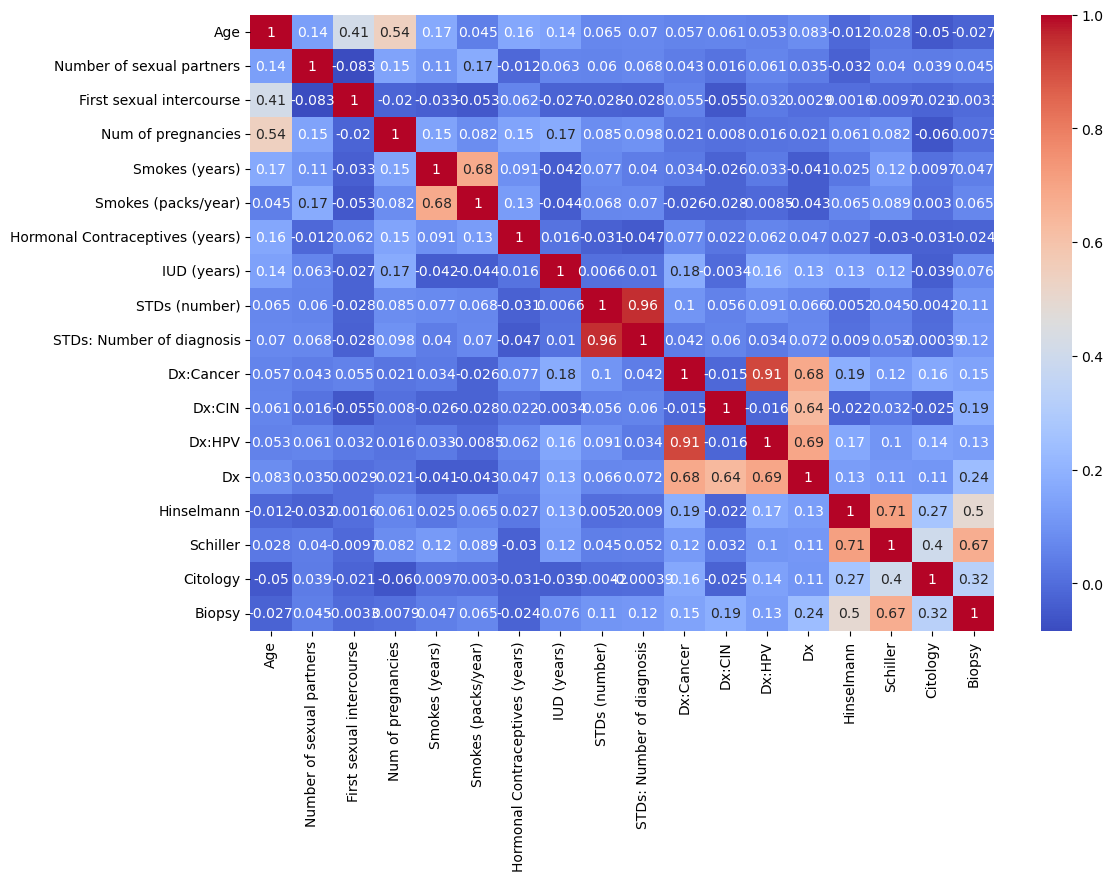

In [21]:
# Compute correlation matrix
correlation_matrix = train_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


#### **Now, one of the features out of the two different features getting a correlation coefficient of 0.8 or more must be redundant**

##### **To decide which one of the two should be removed, we use the average correlation of each feature with all other features as the criteria and remove the feature with the higher average correlation**

In [22]:
def remove_redundant_features(df, threshold=0.8):
    corr_matrix = df.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    to_drop = set()

    for i, row in enumerate(upper_tri.index):
        for j, col in enumerate(upper_tri.columns):
            if upper_tri.at[row, col] > threshold:
                if corr_matrix[row].mean() > corr_matrix[col].mean():
                    to_drop.add(row)
                else:
                    to_drop.add(col)

    df_reduced = df.drop(to_drop, axis=1)
    
    return df_reduced, list(to_drop)

new_df_reduced, removed_features = remove_redundant_features(train_df, threshold=0.8)

# Print the removed features
print("Removed features:", removed_features)
print(new_df_reduced.shape)
print(test_df.columns)
print(test_df.shape)

Removed features: ['STDs (number)', 'Dx:Cancer']
(567, 32)
Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')
(142, 34)


In [23]:
test_df = test_df.drop(['STDs (number)', 'Dx:Cancer'], axis=1)
print(test_df.shape)

(142, 32)


### **Now we scale the features we got and draw a boxplot for the scaled features**

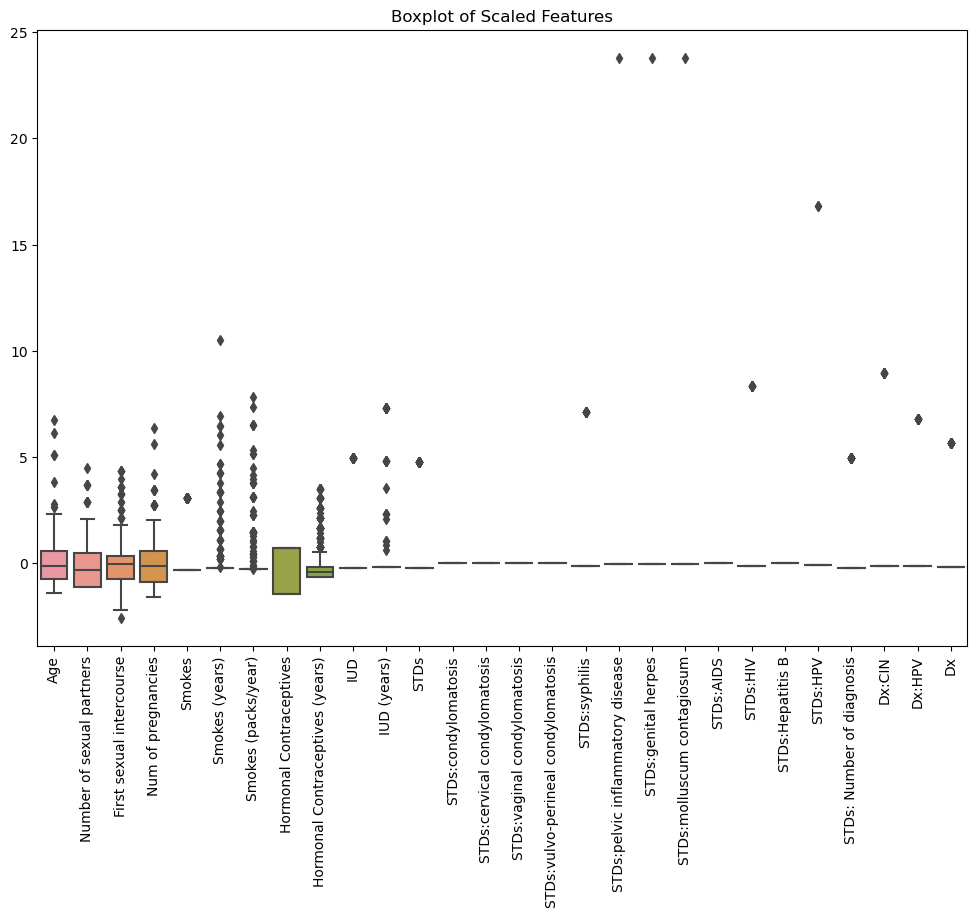

(567, 28)
Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'Dx:CIN',
       'Dx:HPV', 'Dx'],
      dtype='object')
(142, 28)


In [24]:
# Separate the features and target variables
X = new_df_reduced.drop(['Hinselmann','Schiller','Citology','Biopsy'], axis=1)
y = new_df_reduced[['Hinselmann','Schiller','Citology','Biopsy']]
X_test = test_df.drop(['Hinselmann','Schiller','Citology','Biopsy'], axis=1)
y_test = test_df[['Hinselmann','Schiller','Citology','Biopsy']]
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_test_scaled = scaler.transform(X_test)

# Create a DataFrame with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_scaled_df)
plt.xticks(rotation=90)
plt.title("Boxplot of Scaled Features")
plt.show()
print(X_scaled_df.shape)
print(X_scaled_df.columns)
print(X_test_scaled_df.shape)

### **Applying PCA to extract principle components**

In [25]:
# Apply PCA
pca = PCA(n_components=0.98)  # Retain 98% of the variance in the dataset
X_pca = pca.fit_transform(X_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Combine the PCA-transformed features with the target variables
new_df_pca = pd.DataFrame(X_pca)
new_test_df_pca = pd.DataFrame(X_test_pca)
new_df_pca = pd.concat([new_df_pca, y.reset_index(drop=True)], axis=1)
new_test_df_pca = pd.concat([new_test_df_pca, y_test.reset_index(drop=True)], axis=1)

print(new_df_pca.head())
print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)
print(new_df_pca.shape)
print(new_test_df_pca.shape)
print(new_test_df_pca.head())

          0         1         2         3         4         5         6  \
0 -0.731089 -0.496109 -0.979115  0.403722  1.347017 -0.461713  0.455155   
1 -0.040390 -0.161966  0.545499 -1.077179 -1.063208 -2.045917  0.822007   
2  8.504099 -5.786676  1.243078  5.205960 -0.418214 -6.142331 -6.096200   
3  7.215221 -3.794521 -2.738827 -0.560291 -0.958725 -2.145151 -0.631163   
4  0.559571  0.079885  1.804507 -2.109930 -2.506533 -3.302969  0.852647   

          7         8         9  ...        11        12        13        14  \
0 -0.361214  0.151476 -0.043387  ... -0.437242 -0.046910  0.352076  0.678183   
1 -0.840830 -0.227276 -0.161187  ... -0.367622  0.636464  0.064826  0.241415   
2  3.757153  0.440292 -0.127543  ... -1.081341 -0.246781  1.419348 -0.338939   
3  2.959132 -0.071927 -0.375684  ... -3.262530  1.079007 -1.337424  0.381439   
4 -1.145322 -0.447016 -0.416668  ... -0.122549  2.276959  0.418435  0.535124   

         15        16  Hinselmann  Schiller  Citology  Biopsy  
0  0

### **Using SMOTE to balance the data**

In [26]:
def apply_smote_for_target_variable(train_data, target_column_name):
    X_train = train_data.drop(target_column_name, axis=1)
    y_train = train_data[target_column_name]
    
    # Convert column names to strings
    X_train.columns = X_train.columns.astype(str)
    
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    return X_train_resampled, y_train_resampled

# List of target variables
target_variables = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']

# Apply SMOTE for each target variable
smote_data = {}
for target in target_variables:
    smote_data[target] = apply_smote_for_target_variable(new_df_pca, target)

X_train_resampled_hinselmann, y_train_resampled_hinselmann = smote_data['Hinselmann']
X_train_resampled_schiller, y_train_resampled_schiller = smote_data['Schiller']
X_train_resampled_citology, y_train_resampled_citology = smote_data['Citology']
X_train_resampled_biopsy, y_train_resampled_biopsy = smote_data['Biopsy']
print(X_train_resampled_hinselmann.shape)
print(y_train_resampled_hinselmann.shape)

(1092, 20)
(1092,)


### **Making a histogram for balanced classes of each target variable**

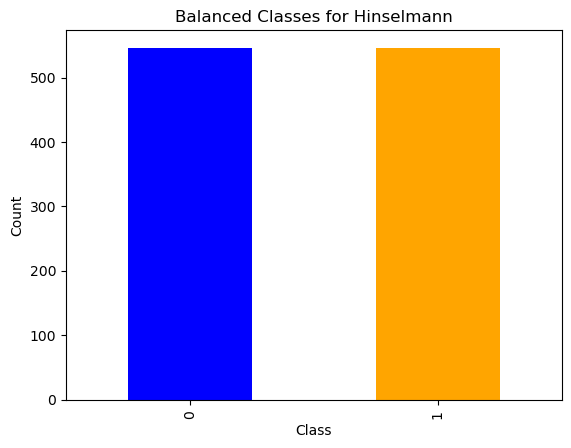

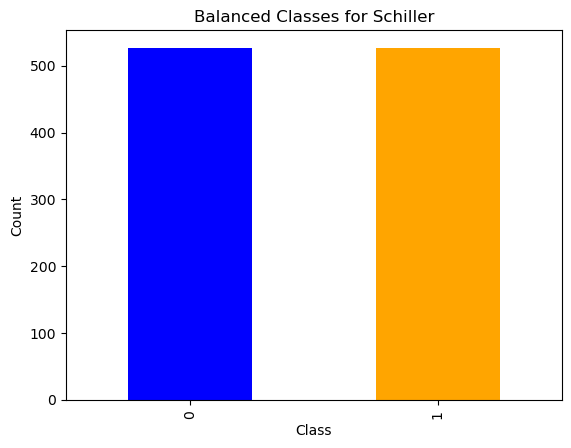

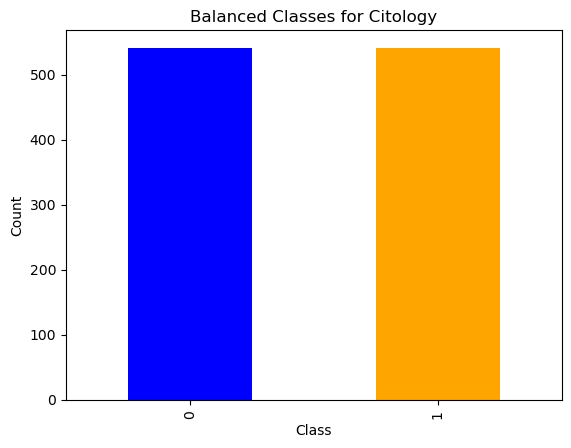

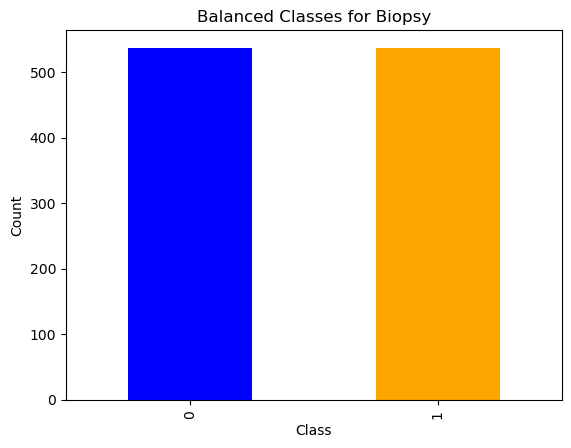

In [27]:
def plot_histogram(y, title):
    plt.figure()
    y.value_counts().plot(kind='bar', color=['blue', 'orange'])
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title(title)
    plt.show()

# Plot histograms for each target variable
target_variables = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']

y_train_resampled_list = [
    y_train_resampled_hinselmann,
    y_train_resampled_schiller,
    y_train_resampled_citology,
    y_train_resampled_biopsy
]

for i, target in enumerate(target_variables):
    plot_histogram(y_train_resampled_list[i], f'Balanced Classes for {target}')

    

## **Finally, training and evaluating the model by SVM and KNN**

#### **We use GridSearchCV to find the best hyperparameters**

#### **We also plot the confusion matrices and find out Accuracy, Presicion and Recall for each target variable**

Results for Hinselmann classification:
----------------------------------------
SVM Accuracy: 0.9930
KNN Accuracy: 0.9859
SVM Precision: 1.0000
KNN Precision: 0.7500
SVM Recall: 0.7500
KNN Recall: 0.7500



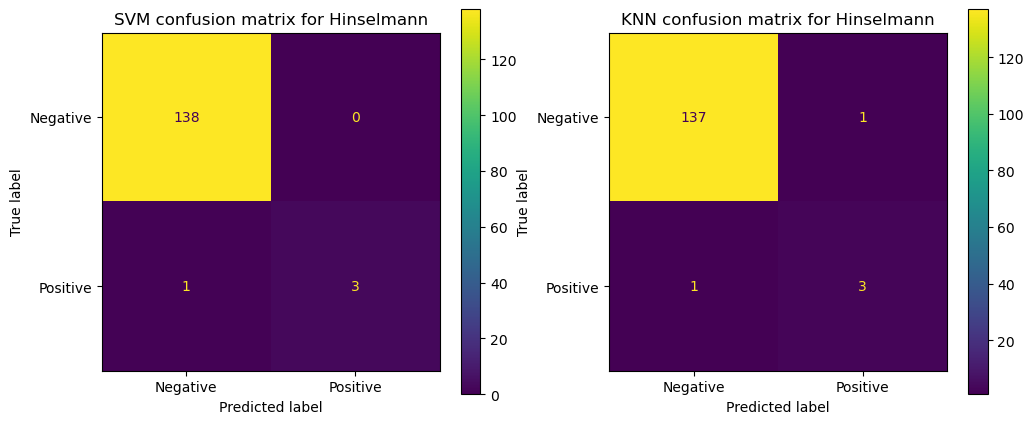

Results for Schiller classification:
----------------------------------------
SVM Accuracy: 0.9507
KNN Accuracy: 0.9577
SVM Precision: 0.4286
KNN Precision: 0.5000
SVM Recall: 0.5000
KNN Recall: 0.5000



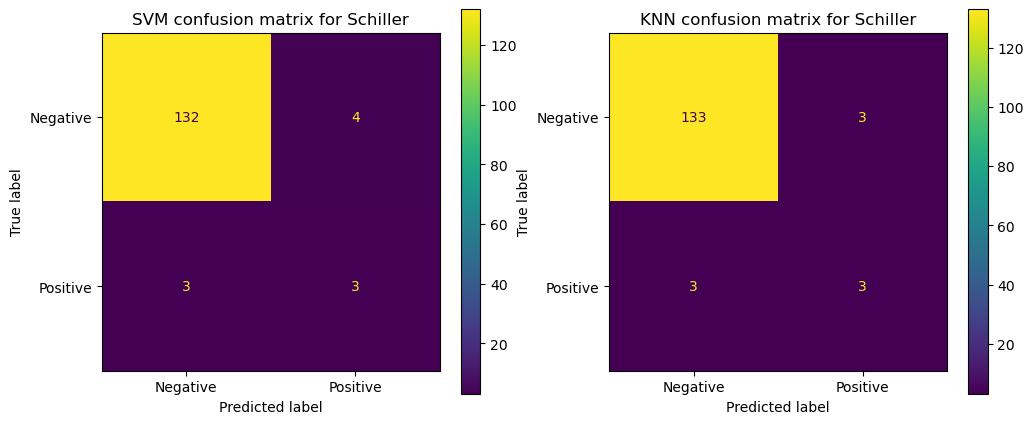

Results for Citology classification:
----------------------------------------
SVM Accuracy: 0.8592
KNN Accuracy: 0.9155
SVM Precision: 0.0000
KNN Precision: 0.0000
SVM Recall: 0.0000
KNN Recall: 0.0000



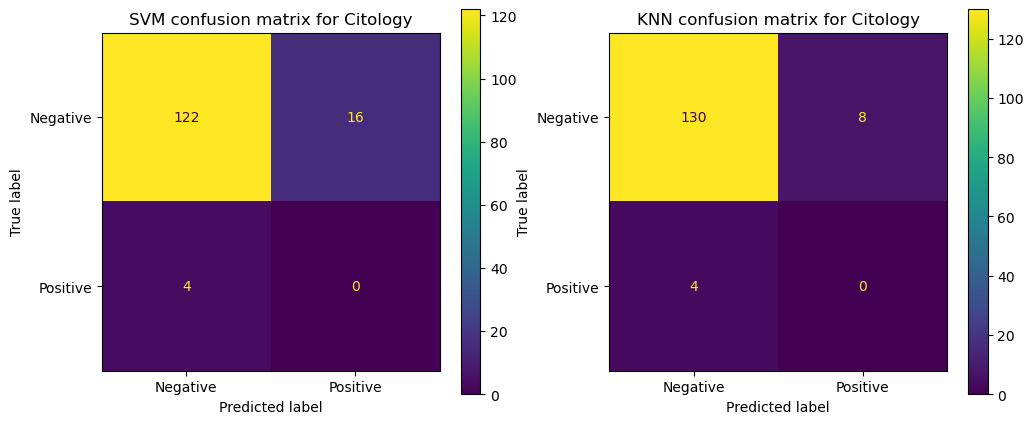

Results for Biopsy classification:
----------------------------------------
SVM Accuracy: 0.9577
KNN Accuracy: 0.9648
SVM Precision: 0.3333
KNN Precision: 0.4286
SVM Recall: 0.5000
KNN Recall: 0.7500



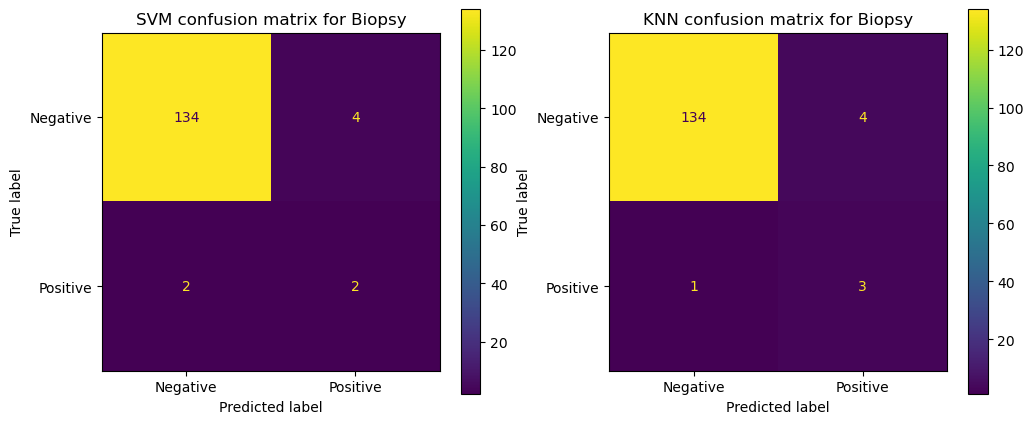

In [28]:
# Function to perform hyperparameter tuning, training, and evaluation
def train_and_evaluate(X_train, y_train, X_test, y_test, target):
    # Hyperparameter tuning for SVM
    svm_params = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'degree': [2, 3],
        'gamma': ['scale', 'auto'],
        'class_weight': ['balanced']  # Add 'class_weight' parameter
    }
    svm = SVC(random_state=42)
    svm_grid = GridSearchCV(svm, svm_params, cv=5, n_jobs=-1)
    svm_grid.fit(X_train, y_train)
    svc_best_params = svm_grid.best_params_

    # Hyperparameter tuning for KNN
    knn_params = {
        'n_neighbors': list(range(1, 21)),
        'weights': ['uniform', 'distance'],  # Include 'distance' in weights parameter
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }
    knn = KNeighborsClassifier()
    knn_grid = GridSearchCV(knn, knn_params, cv=5, n_jobs=-1)
    knn_grid.fit(X_train, y_train)
    knn_best_params = knn_grid.best_params_

    # Train SVM
    svm = SVC(**svc_best_params)
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)

    # Train KNN
    knn = KNeighborsClassifier(**knn_best_params)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)

    # Evaluate classifiers
    metrics = {'Accuracy': accuracy_score, 'Precision': precision_score, 'Recall': recall_score}
    results = {}
    for metric_name, metric_func in metrics.items():
        results[f'SVM {metric_name}'] = metric_func(y_test, y_pred_svm)
        results[f'KNN {metric_name}'] = metric_func(y_test, y_pred_knn)
    
    # Display evaluation metrics in a tabular format
    print(f"Results for {target} classification:")
    print("-" * 40)
    for metric, value in results.items():
        print(f"{metric}: {value:.4f}")
    print()

    # Plot confusion matrices
    cm_svm = confusion_matrix(y_test, y_pred_svm)
    cm_knn = confusion_matrix(y_test, y_pred_knn)
    display_labels = ['Negative', 'Positive']

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    disp_svm = ConfusionMatrixDisplay(cm_svm, display_labels=display_labels)
    disp_knn = ConfusionMatrixDisplay(cm_knn, display_labels=display_labels)

    disp_svm.plot(ax=axes[0], cmap='viridis')
    disp_knn.plot(ax=axes[1], cmap='viridis')

    axes[0].set_title(f'SVM confusion matrix for {target}')
    axes[1].set_title(f'KNN confusion matrix for {target}')

    plt.show()

# Run the function for each target variable
for target in target_variables:
    X_train, y_train = smote_data[target]
    X_test = new_test_df_pca.drop(target, axis=1)
    y_test = new_test_df_pca[target]

    # Convert column names to strings
    X_test.columns = X_test.columns.astype(str)
    
    train_and_evaluate(X_train, y_train, X_test, y_test, target)

